In [0]:
import nltk
nltk.download('book')

from nltk.book import *

import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

## Analizando Texto

In [0]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [0]:
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [0]:
len(text1)

260819

## Medida de riqueza lexica en un texto

In [0]:
vocabulario = sorted(set(text1)) #se obtienen los valores unicos

print(vocabulario[1000:1050])

['Crew', 'Crish', 'Crockett', 'Cross', 'Crossed', 'Crossing', 'Crotch', 'Crowding', 'Crown', 'Crozetts', 'Cruelty', 'Cruising', 'Cruppered', 'Crusaders', 'Crushed', 'Crying', 'Cuba', 'Curious', 'Curse', 'Cursed', 'Curses', 'Cussed', 'Customs', 'Cut', 'Cutter', 'Cutting', 'Cuvier', 'Cyclades', 'Czar', 'D', 'DAGGOO', 'DAM', 'DANCE', 'DANCING', 'DANIEL', 'DANISH', 'DARKENS', 'DARWIN', 'DAVENANT', 'DEAD', 'DEATH', 'DEBELL', 'DECK', 'DEL', 'DESTROYED', 'DEVIL', 'DICTIONARY', 'DID', 'DIGNITY', 'DISCOVERS']


In [0]:
# rl = longitud de vocabulario / longitud del texto

rl = len(vocabulario)/len(text1)
print(rl)

0.07406285585022564


In [0]:
def riqueza_lexica(texto):
  vocabulario = sorted(set(text1))
  return len(vocabulario)/len(texto)

riqueza_lexica(text1)

0.07406285585022564

In [0]:
def porcentaje_palabra(palabra,texto):
  return 100*texto.count(palabra)/len(texto)

porcentaje_palabra('monster',text1)


0.018786974875296663

In [0]:
text1.count('monster')

49

## Estadistica del lenguaje

In [0]:

import time

dic = {}

time.sleep(1)
for palabra in set(text1):

  dic[palabra] = text1.count(palabra)

dic
%time

#Es efectivo pero es muy demorado por lo tanto utilizamos el metodo FreqDist

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


Método FreqDist de NLTK

In [0]:
fdist = FreqDist(text1)

In [0]:
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

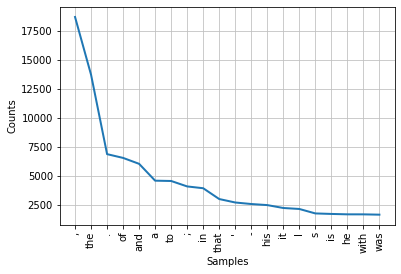

In [0]:
fdist.plot(20)

In [0]:
fdist['is']

1695

## Distribuciones sobre contenido con filtro-fino

In [0]:
long_words = [palabra for palabra in text1 if len(palabra) > 5]
vocabulario_filtrado = sorted(set(long_words)) # obtiene los elementos y los ordena en oreden alfabetico
vocabulario_filtrado[:10]

['ACCOUNT',
 'ADDITIONAL',
 'ADVANCING',
 'ADVENTURES',
 'AFFGHANISTAN',
 'AFRICA',
 'AGAINST',
 'ALFRED',
 'ALGERINE',
 'AMERICA']

In [0]:
palabras_interesantes = [(palabra, fdist[palabra]) for palabra in set(text1) if len(palabra) > 5 and fdist[palabra] > 10]
dtypes = [('word','S10'),('frequency', int)]
palabras_interesantes = np.array(palabras_interesantes, dtype = dtypes)

In [0]:
palabras_interesantes = np.sort(palabras_interesantes, order = 'frequency')
palabras_interesantes

array([(b'America',  11), (b'Father',  11), (b'Fleece',  11),
       (b'Guernsey',  11), (b'Heaven',  11), (b'NANTUCKET',  11),
       (b'Perseus',  11), (b'Ramadan',  11), (b'Therefore',  11),
       (b'additional',  11), (b'advanced',  11), (b'appearance',  11),
       (b'baleen',  11), (b'barbaric',  11), (b'beating',  11),
       (b'begins',  11), (b'beholding',  11), (b'belong',  11),
       (b'blackness',  11), (b'blanket',  11), (b'blessed',  11),
       (b'butter',  11), (b'central',  11), (b'clothes',  11),
       (b'coiled',  11), (b'commotion',  11), (b'concluding',  11),
       (b'contact',  11), (b'convenient',  11), (b'covered',  11),
       (b'cursed',  11), (b'demanded',  11), (b'desired',  11),
       (b'direct',  11), (b'element',  11), (b'elevated',  11),
       (b'elsewhere',  11), (b'excellent',  11), (b'experience',  11),
       (b'fashion',  11), (b'fashioned',  11), (b'fastened',  11),
       (b'features',  11), (b'fellows',  11), (b'fierce',  11),
       (b'fif

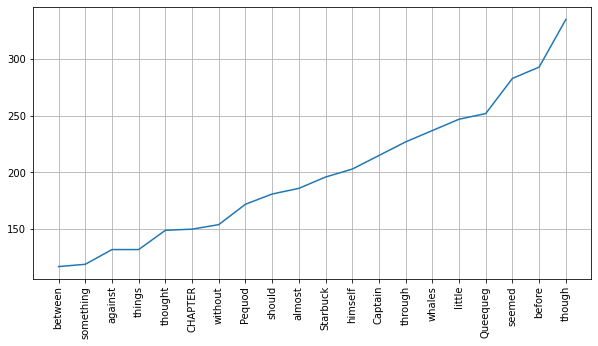

In [0]:
top_words = 20
palabras_interesantes = np.sort(palabras_interesantes, order = 'frequency')[-top_words:]
x = palabras_interesantes['word']
y = palabras_interesantes['frequency']
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xticks(x,rotation='vertical')
plt.grid(True)
plt.show()